In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [4]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...
1,2nd hand electric bicycle \nrepaired \nbrand n...
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...
3,My new ebike is smooth...\n\nBut the bike seat...
4,@supcat I can't fault them. Both Yamaha and I ...
...,...
1995,"Two videos this week. Tonight, we review an e..."
1996,This is bang on. And I am sad some degenerate ...
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...


In [5]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety
...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1


In [6]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [7]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville,infinitemagnus1 alessandrodett9 realchrisrufo ...
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite,2nd hand electric bicycle repaired brand new tire
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow,tracyswartz rainiermarquez chifamilybiking web...
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule,new ebike smooth bike seat firm ass
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety,supcat ca fault yamaha think bosch make ebike ...
...,...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners,two videos week tonight review ebike borrowed ...
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood,bang sad degenerate stole guys ebike cycling k...
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike,wolf king gt back stock ebikeplus ottawa minim...
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1,gocycles gx ebike bromptonalternative


In [8]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville,infinitemagnus1 alessandrodett9 realchrisrufo ...,0.000000,0.000000
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite,2nd hand electric bicycle repaired brand new tire,0.068182,0.227273
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow,tracyswartz rainiermarquez chifamilybiking web...,0.000000,0.100000
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule,new ebike smooth bike seat firm ass,0.112121,0.451515
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety,supcat ca fault yamaha think bosch make ebike ...,0.000000,0.000000
...,...,...,...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners,two videos week tonight review ebike borrowed ...,0.250000,0.533333
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood,bang sad degenerate stole guys ebike cycling k...,-0.750000,1.000000
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike,wolf king gt back stock ebikeplus ottawa minim...,0.000000,0.000000
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1,gocycles gx ebike bromptonalternative,0.000000,0.000000


In [9]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['bosch', 'eleglide', 'shimano', 'trek', 'rad', 'aventon', 'specialized']

In [10]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,bosch
1,eleglide
2,shimano
3,trek
4,rad
5,aventon
6,specialized


In [11]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [12]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,bosch,0.256099
1,eleglide,0.212500
2,shimano,0.201034
3,trek,0.187273
4,rad,0.140523
5,aventon,0.117857
6,specialized,0.302462


In [13]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

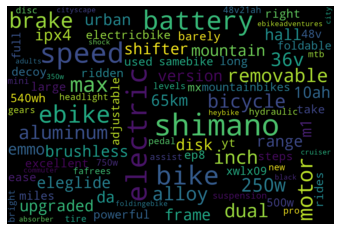

In [14]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'shimano'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [15]:
# for alternative visualizations, extract the keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(brand_all_text(b))
kwords

{'eleglide': 2,
 'm1': 2,
 'electric': 7,
 'bike': 6,
 'upgraded': 2,
 'version': 2,
 'inch': 3,
 'mountain': 2,
 'urban': 2,
 'bicycle': 3,
 '250w': 3,
 'hall': 2,
 'brushless': 2,
 'motor': 4,
 'shimano': 8,
 'shifter': 2,
 '36v': 3,
 'removable': 3,
 'battery': 6,
 'max': 4,
 'speed': 7,
 '65km': 2,
 'range': 2,
 'ipx4': 2,
 'aluminum': 3,
 'alloy': 3,
 'frame': 2,
 'dual': 3,
 'disk': 2,
 'brake': 4,
 'da': 2,
 'right': 1,
 'ebike': 5,
 'electricbike': 1,
 'excellent': 1,
 'used': 1,
 'yt': 1,
 'decoy': 1,
 'mx': 1,
 'powerful': 1,
 'steps': 1,
 'ep8': 1,
 'large': 1,
 '540wh': 1,
 'take': 1,
 'long': 1,
 'rides': 1,
 'ease': 1,
 'barely': 1,
 'ridden': 1,
 'miles': 1,
 'mountainbikes': 1,
 'samebike': 1,
 'xwlx09': 1,
 'foldable': 1,
 '500w': 1,
 '48v': 1,
 '10ah': 2,
 'adjustable': 1,
 'full': 1,
 'suspension': 1,
 'mtb': 1,
 'fafrees': 1,
 'tire': 1,
 'gears': 1,
 'disc': 1,
 'bright': 1,
 'headlight': 1,
 'new': 1,
 'emmo': 2,
 'mini': 1,
 'pro': 1,
 '750w': 1,
 '48v21ah': 1,
 

In [16]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
eleglide,2
m1,2
electric,7
bike,6
upgraded,2
...,...
shock,1
absorber,1
commuter,1


<AxesSubplot:xlabel='keyword'>

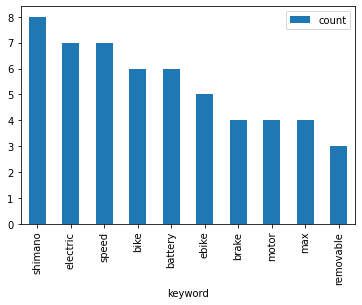

In [17]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(10).plot.bar()